# NFL News Analysis (Development)

As I am seeking to make the NFL more intelligent, here are some development ideas on putting together some interesting stats based on related NFL news articles that i've been collecting.

### Imports

In [1]:
import pandas as pd

# Data Visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style


import nfl news dataset

In [2]:
nfl = pd.read_csv('nfl_news_w2.csv')
nfl.head()

,date,keywords,team,text,title,url,week,compound,neg,neu,pos
0,2017-09-22,"['vs', 'predictions', 'team', '2018', 'broadca...",eagles,its finally arrived the nfl season and the e...,"Eagles vs. Falcons: Predictions, odds and broa...",https://www.phillyvoice.com/eagles-falcons-sea...,0.0,0.9973,0.068,0.795,0.138
1,2017-09-22,"['ryan', 'bucs', 'odds', 'eagles', 'saints', '...",eagles,the philadelphia eagles picked up a sloppy win...,"Eagles vs. Bucs: Predictions, odds and broadca...",https://www.phillyvoice.com/eagles-buccaneers-...,0.0,0.9949,0.062,0.815,0.124
2,2017-09-28,"['bears', 'packers', 'complete', 'game', 'win'...",bears,authors note the original version of this stor...,The complete history of the Bears-Packers rivalry,https://www.windycitygridiron.com/2017/9/28/16...,0.0,1.0000,0.066,0.741,0.193
3,2017-11-03,"['rounding', 'bucs', 'nfl', 'win', 'eagles', '...",eagles,the eagles were able to squeak out a win in th...,Week 2 NFL predictions: Rounding up the expert...,https://www.phillyvoice.com/week-2-nfl-predict...,0.0,0.9856,0.043,0.846,0.111
4,2017-12-26,"['bengals', '2017', 'starting', 'season', 'ale...",bengals,want to know more about bengals starting right...,"Podcast: Bengals Line w/ Alex Redmond, 2017",https://espn1530.iheart.com/featured/lance-mca...,0.0,0.6318,0.000,0.864,0.136


import some NFL stats for future correlations
pulled from [pro-football-references.com](https://www.pro-football-reference.com/years/2018/)

In [12]:
standings = pd.read_csv('standings.csv')

# indicate week wins so we can trend it across new articles
standings.loc[standings.W != 0, "w1"] = 1
standings.loc[standings.W == 0, "w1"] = 0

standings.head()

,Tm,W,L,T,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS,w1
0,patriots,1,0,0,1.0,27,20,7,7.0,-7.0,0.0,0.0,0.0,1.0
1,dolphins,1,0,0,1.0,27,20,7,7.0,-7.0,0.0,0.0,0.0,1.0
2,jets,1,0,0,1.0,48,17,31,31.0,-31.0,0.0,0.0,0.0,1.0
3,bills,0,1,0,0.0,3,47,-44,-44.0,6.7,-37.3,-21.0,-16.3,0.0
4,bengals,2,0,0,1.0,68,46,22,11.0,7.6,18.6,10.5,8.2,1.0


### File Preparations

Open Files

In [23]:
import glob
all_files = glob.glob("./rss_feed/spyder_*")  
nfl_new = pd.concat(pd.read_csv(f) for f in all_files)
nfl_new = nfl_new.reset_index(drop=True)
nfl_new[nfl_new.team=='cowboys'].head()

,date,keywords,team,text,title,url
412,2018-09-05,"['numbers', 'inside', 'season', 'game', 'touch...",cowboys,The Dallas Cowboys regular season schedule kic...,Inside The Numbers: Dallas Cowboys at Carolina...,http://feeds.feedblitz.com/~/568071998/0/insid...
413,2018-09-05,"['portend', 'khalil', 'season', 'hes', 'cowboy...",cowboys,This story is about Published 7m\n\nWhat Dan B...,"What Dan Bailey cut, Khalil Mack trade portend...",https://sportsday.dallasnews.com/dallas-cowboy...
414,2018-09-05,"['witten', 'price', 'earl', 'cowboys', 'thomas...",cowboys,This story is about\n\nShare This Story On...\...,"8 things to know before Panthers, price of Ear...",https://sportsday.dallasnews.com/dallas-cowboy...
415,2018-09-05,"['seattle', 'thirdround', 'seahawks', 'earl', ...",cowboys,Dallas Cowboys quarterback Dak Prescott (4) is...,Dallas Cowboys: Report: Cowboys 'only willing'...,https://sportsday.dallasnews.com/dallas-cowboy...
416,2018-09-05,"['league', 'field', 'maher', 'decisions', 'bai...",cowboys,"FRISCO, Texas (AP) — Second-guessers will be r...",Cowboys turn to untested kicker after dumping ...,https://www.foxsports.com/southwest/story/cowb...


open old file

In [47]:
# 'nfl_news_w2.csv'
nfl = pd.read_csv('nfl_news_preseason_week1.csv')

In [65]:
nfl = nfl.drop('Unnamed: 0', axis=1)

combine dataframes together

add game weeks to each article

In [31]:
def game_weeks(df):
    """
    Create dataset indicate the game week. 
    # https://github.com/JVP3122/Python-Machine-Learning-NFL-Game-Predictor/blob/master/binary_class.py
    """
    
    week_dict = {}
    first_game_date = df.min().date()
    game_date = first_game_date
    season_start_date = pd.to_datetime('2018-09-04 00:00:00').date()
    last_game_date = df.max().date()
    week_num = 1 # start week 1 and increment from there
    
    for i in range((last_game_date - first_game_date).days+1):
        if game_date <= season_start_date:
            week_dict[game_date] = 0
            game_date += datetime.timedelta(days=1)
        else:
            if game_date.weekday() == 1: # check if weekday is Tuesday.. if so reset week_number
                week_num += 1
            week_dict[game_date] = week_num
            game_date += datetime.timedelta(days=1)
    
    week_list = pd.Series(week_dict).to_frame()[0]
    
    return week_list

In [67]:
import datetime

nfl['date'] = pd.to_datetime(nfl['date'])

In [68]:
d = game_weeks(nfl.date)
for o,j in enumerate(d.index):
    nfl.loc[nfl.date == j, 'week'] = d[o]

### Data Processing & Exploratory

Explort the number or articles by team

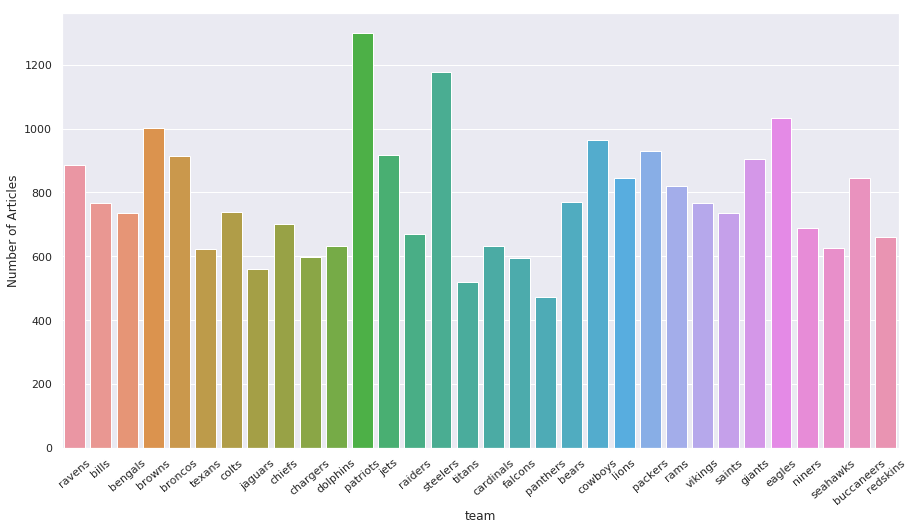

In [69]:
fig = plt.figure(figsize=(15,8))
ax = sns.countplot(x="team", data=nfl)
ax.set(xlabel='team', ylabel = 'Number of Articles')
ax.set_xticklabels(labels=nfl.team.unique(),rotation=40)
plt.show()

### Data Cleaning

remove any empty text rows

In [70]:
nfl = nfl[~nfl.text.isnull()].reset_index(drop=True)

In [71]:
import re

def preprocess_post(post):
    post = ''.join(c for c in post if not c.isdigit())
    post = post.lower()
    post = re.sub('\n', ' ', post)
    post = re.sub(r'[^\w\s]','',post)
    
    
    return post

In [72]:
nfl['text'] = nfl['text'].map(lambda x : preprocess_post(x))
#nfl['title'] = nfl['title'].map(lambda x : preprocess_post(x))

In [73]:
nfl.head()

,date,keywords,team,text,title,url,week
0,2018-09-05,"['season', '09052018', 'hes', 'game', 'ceiling...",ravens,ceiling setters are the wildcard players on an...,Five 'Ceiling Setters' in 2018 09/05/2018,https://russellstreetreport.com/2018/09/05/wor...,1.0
1,2018-09-05,"['game', 'jackson', 'hes', 'lamar', 'rookie', ...",ravens,the rookie cannot stop to talk on the practice...,Ravens rookie Lamar Jackson enters NFL with a ...,http://www.baltimoresun.com/sports/ravens/bs-s...,1.0
2,2018-08-21,"['running', 'injured', 'able', 'think', 'hes',...",ravens,recently a media outlet had ranked a little mo...,"After offseason as Ravens' No. 1 running back,...",http://www.baltimoresun.com/sports/ravens/bs-s...,0.0
3,2018-09-05,"['remember', 'told', 'vedvik', 'does', 'baltim...",ravens,kaare vedvik is a norwegian native who was a...,Ravens kicker does not remember events that le...,https://www.washingtonpost.com/news/early-lead...,1.0
4,2018-09-05,"['preseason', 'game', 'questions', 'bills', 'p...",ravens,the buffalo bills were the recipient of the ba...,5 questions with the enemy: Buffalo Bills – We...,https://ravenswire.usatoday.com/2018/09/05/5-q...,1.0


## Sentiment Analysis

Sentiment analysis is a process that allows us to each a computer to understand if the opinion expressed in a text is either: (1) positive, negative, or (3) neutral. In this section we are going to apply sentiment analysis to the NFL news articles that we gathered other the 2018 season from various channels that we scapped from. The results from the sentiments provides us important insights about the media and public opion and perception towards the teams, players, matchups and performance throughout the season. 

At a high level, sentiment analysis works by consuming a clean and pre-processes set of textual documents. In this section we will use all articles that we scrapped. We have previously cleansed. For practical purposes, we will use the article in its entirety and we did not capture any of the comments section associated with the article. The result is an output of the sentiment prediction made for the entire article. 

In this section we are only capturing the complete sentiment from the article. Its noteworthy to mention that we will be predicting the sentiment from verious topics that are discussed within the document. In later analysis, we will perform entity-level analysis oppose to document level analsyis which is what we are performing here. Entity-level analysis allows us to predict sentiments associated with individual entities such as team: cowboys (team in question) and panthers (opponent) and players: Dak Prescott (QB), Ezekiel Elliot (RB). 

For more on entity level sentiment anlaysis refer to the next section.

Inspiration: http://blog.aylien.com/using-entity-level-sentiment-analysis-to-understand-news-content/

In [74]:
#import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [99]:
def news_sentiment(articles):
    sentiments = []
    
    sid = SentimentIntensityAnalyzer()
    for article in articles:
        ss = sid.polarity_scores(article)
        #print(ss)
        sentiments.append(ss)
    
    return sentiments 

In [100]:
sent = news_sentiment(nfl['text'])

In [101]:
sent_frame = pd.DataFrame(sent)
nfl = pd.concat([nfl, sent_frame], axis = 1)
#dal.drop(['index'], axis = 1)

nfl = nfl.sort_values('date') # This now sorts in date order

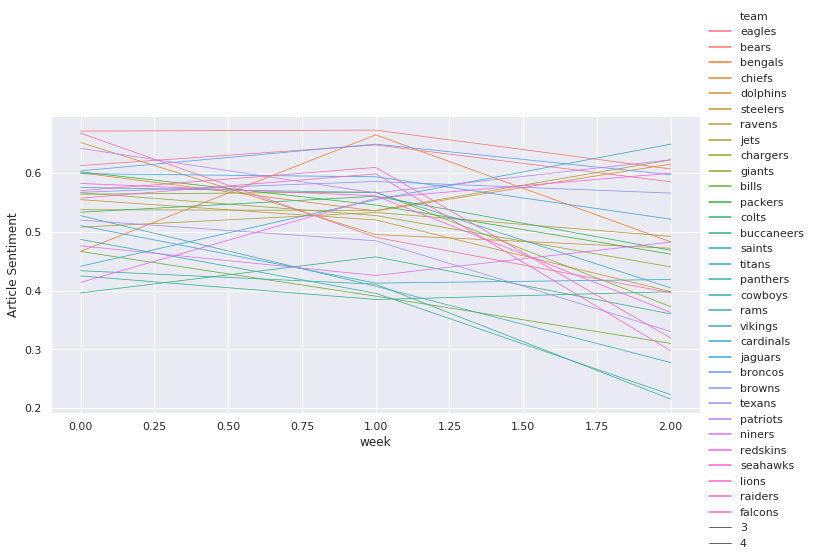

In [104]:
#plt.figure(figsize=(15,15))
ax = sns.relplot(x="week", y="compound", kind="line", hue='team', ci=None, data=nfl, size=4, aspect = 2)
ax.set(xlabel='week', ylabel = 'Article Sentiment')

In [90]:
dal.week.unique()

array([0., 1., 2.])

save nfl dataframe to csv

In [105]:
nfl.to_csv('nfl_news_w2.csv' , encoding='utf-8', index=False)

# LDA Modeling with Gensim

https://github.com/pwiercinski/new_york_times_comments/blob/master/step2_lda_model.ipynb

In [16]:
df = nfl[(nfl.team=='cowboys') | (nfl.team=='seahawks') | (nfl.team=='steelers') & (nfl.week>=2)]
df.shape

(1848, 11)

In [17]:
#from nltk.corpus import stopwords
#stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

import re

def preprocess_post(post):
    post = post.lower()
    post = re.sub('\n', ' ', post)
    post = re.sub(r'[^\w\s]','',post)
    post = ''.join(c for c in post if not c.isdigit())
    
    return post

from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

import nltk
from nltk.corpus import stopwords


def remove_stop_words():
    '''
    Remove any stopwards as needed
    '''
    default_stopwords = set( stopwords.words('english') ).union( set(ENGLISH_STOP_WORDS) )
    my_additional_stop_words = (nfl_news_stopwords) # Add any additional stopwords we dont want and update the list
    default_stopwords = default_stopwords.union(my_additional_stop_words)
    return(default_stopwords)   

nfl_news_stopwords = ['game', 'team', 'season', 'year', 'like', 'time', 'just', 'nfl', '2018', 'august', 'field', 
                        'games', 'who', 'years', 'pm', 'et', 'aug', 'say', 'lot', 'august', 'let', 'week', 'vs', 'going', 
                        'links', 'day', '2017', 'things', 'really', 'numbers', 'live', 'saw', 'does', 'fan', 'youre', '53',
                        'didnt', 'makes', '12', 'used', 'yes', 'let', 'hey', 'gets', 'cat', 'getty', 'images', 'th', 
                        'think', 'said', 'im', 'hes', 'thats', 'tag', 'need', 'went', 'dont', 'look', 'want', 'st', 'nd', 
                        'rd', 'isnt', 'play','player']

In [18]:
df['text'] = df['text'].map(lambda x : preprocess_post(x))

/home/redne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
data = df.text.values.tolist()

In [20]:
import gensim

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # tokenizing & removing punctuation

data_words = list(sent_to_words(data))

In [22]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)  # building bigram model
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  # building trigram model
trigram_mod = gensim.models.phrases.Phraser(trigram)

/home/redne/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [23]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in remove_stop_words()] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'ADV']):  # only consider nouns, adjectives and adverbs
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [24]:
from gensim.utils import simple_preprocess
import spacy

data_words_nostops = remove_stopwords(data_words)  # removing stopwords
data_words_bigrams = make_bigrams(data_words_nostops)  # forming bigrams

nlp = spacy.load('en', disable=['parser', 'ner'])

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'ADV'])  # lemmatize

In [25]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_lemmatized)  # define id: word dictionary

texts = data_lemmatized  # text corpus
corpus = [id2word.doc2bow(text) for text in texts]  # term document frequency

In [26]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
from tqdm import tqdm
from pprint import pprint
from gensim.models import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=1, passes=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [30]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=20, limit=150, step=10)

 62%|██████▏   | 8/13 [14:20<08:57, 107.51s/it]/home/redne/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:775: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)
100%|██████████| 13/13 [25:52<00:00, 119.41s/it]


In [31]:
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

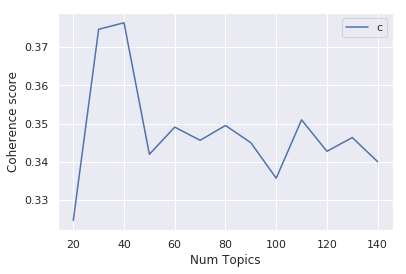

In [32]:
limit=150; start=20; step=10;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [33]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,  # defining lda model
                                           id2word=id2word,
                                           num_topics=80, 
                                           random_state=1,
                                           passes=30,
                                           chunksize=2000)

In [34]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(7,
  '0.027*"state" + 0.023*"oklahoma_state" + 0.018*"quarterback" + '
  '0.015*"gundy" + 0.012*"big" + 0.012*"cornelius" + 0.012*"college" + '
  '0.010*"starter" + 0.010*"junior" + 0.009*"kempt"'),
 (22,
  '0.027*"preseason" + 0.015*"good" + 0.014*"cowboy" + 0.013*"defensive" + '
  '0.011*"not" + 0.011*"sunday" + 0.010*"end" + 0.008*"great" + '
  '0.008*"gregory" + 0.007*"able"'),
 (47,
  '0.059*"cowboy" + 0.027*"dalla" + 0.026*"att_stadium" + 0.021*"morning_new" '
  '+ 0.015*"arlington_texas" + 0.014*"practice" + 0.014*"preseason" + '
  '0.014*"sunday" + 0.014*"linebacker" + 0.013*"vander_esch"'),
 (49,
  '0.038*"cowboy" + 0.022*"preseason" + 0.016*"practice" + 0.013*"article" + '
  '0.011*"team" + 0.011*"dalla" + 0.010*"tuesday" + 0.010*"sbnation" + '
  '0.010*"good" + 0.009*"regular"'),
 (35,
  '0.031*"seahawk" + 0.026*"griffin" + 0.025*"preseason" + 0.018*"seattle" + '
  '0.013*"linebacker" + 0.013*"shaquem_griffin" + 0.012*"yard" + '
  '0.011*"raider" + 0.010*"thursday" + 0.009

In [35]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.788516485315398

Coherence Score:  0.35934820814595697


In [36]:
pyLDAvis.enable_notebook()  # topic visualisation
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, sort_topics=False)
vis

/home/redne/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
0      0.396509        1       1  0.008346 -0.106782
1      0.191340        1       2  0.123264 -0.018650
2      0.953407        1       3 -0.058127 -0.037106
3      1.388215        1       4 -0.091156  0.080694
4      0.893725        1       5 -0.062356 -0.103936
5      0.513381        1       6  0.020632  0.022310
6      0.405201        1       7  0.039603  0.070169
7      0.194668        1       8  0.173342 -0.045238
8      0.831186        1       9  0.074353  0.193528
9      0.352491        1      10  0.168652  0.090682
10     1.916108        1      11 -0.130445  0.112338
11     0.610440        1      12  0.112359  0.053149
12     1.630272        1      13 -0.134179 -0.097730
13     0.332425        1      14  0.145979  0.047867
14     1.923574        1      15 -0.130475 -0.049143
15     0.403562        1      16  0.079992  0.014168
16     1.093646        1      17  0.036643  0.105488
17     0.323054        1      18  0.033053  0.078364
18     0.323904        1      19  0.015177 -0.074512
19     0.867734        1      20  0.009657  0.003524
20     0.493421        1      21  0.126655 -0.059761
21     0.897969        1      22  0.000289  0.067201
22     0.713404        1      23 -0.033624  0.021844
23     0.550994        1      24  0.002923  0.031617
24     1.023158        1      25  0.019690 -0.101743
25     0.497616        1      26  0.055382  0.049548
26     0.297530        1      27  0.175916 -0.094180
27     0.594759        1      28  0.033263 -0.118629
28     1.136711        1      29 -0.050841  0.116052
29     9.218409        1      30 -0.145575  0.132726
...         ...      ...     ...       ...       ...
50     0.382979        1      51  0.140800 -0.150502
51     0.539649        1      52 -0.031403 -0.118618
52     3.050572        1      53 -0.117839  0.119950
53     1.070539        1      54 -0.047639 -0.080245
54     3.214022        1      55 -0.155429 -0.104484
55     0.492703        1      56  0.110668 -0.033325
56     0.738691        1      57  0.036647  0.074879
57     1.043377        1      58 -0.075204 -0.098453
58     2.137579        1      59 -0.039118  0.028485
59     6.028768        1      60 -0.180277 -0.079409
60     0.317722        1      61  0.084750 -0.051696
61     0.710379        1      62 -0.053176 -0.100116
62     0.278642        1      63  0.124144 -0.072376
63     1.161268        1      64 -0.079988 -0.095651
64     0.618688        1      65  0.015153  0.042863
65     0.368354        1      66  0.177561  0.064107
66     1.330576        1      67 -0.048162  0.115366
67     0.702626        1      68 -0.008866  0.000972
68     0.531964        1      69 -0.006965 -0.071530
69     0.349698        1      70  0.092304  0.035153
70     0.582276        1      71  0.025423 -0.038786
71     1.034495        1      72  0.040158  0.099463
72     0.378873        1      73  0.122736  0.019616
73     0.361349        1      74  0.105536 -0.033884
74     2.686051        1      75 -0.085551 -0.003116
75     0.632915        1      76 -0.011810 -0.085886
76     0.133845        1      77  0.199632 -0.041594
77     0.496950        1      78  0.064806  0.072870
78     3.290884        1      79 -0.090792 -0.071674
79     0.544493        1      80  0.026904 -0.088149

[80 rows x 5 columns], topic_info=     Category         Freq         Term        Total  loglift  logprob
term                                                                  
5     Default  5159.000000       cowboy  5159.000000  30.0000  30.0000
337   Default  2333.000000      seahawk  2333.000000  29.0000  29.0000
338   Default  1462.000000      seattle  1462.000000  28.0000  28.0000
24    Default  1873.000000    preseason  1873.000000  27.0000  27.0000
249   Default   936.000000       roster   936.000000  26.0000  26.0000
141   Default  2011.000000         yard  2011.000000  25.0000  25.0000
2463  Default   754.000000 

In [37]:
df['corpus'] = corpus

/home/redne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
df['lda_topics'] = df['corpus'].apply(lambda x:lda_model.get_document_topics(x))

/home/redne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
all_topics = lda_model.show_topics(80)

In [40]:
topics_dict = {all_topics[i][0]: all_topics[i][1] for i in range(len(all_topics))}

In [41]:
df.head()

,date,keywords,team,text,title,url,week,compound,neg,neu,pos,corpus,lda_topics
61,2018-08-26,"['defensive', 'working', 'reveals', 'status', ...",cowboys,dallas cowboys defensive tackle maliek collins...,Cowboys defensive coordinator Rod Marinelli re...,https://sportsday.dallasnews.com/dallas-cowboy...,0.0,0.8591,0.000,0.897,0.103,"[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2...","[(8, 0.81375295), (24, 0.16408795)]"
62,2018-08-26,"['speculation', 'status', 'jones', 'gregorys',...",cowboys,dallas cowboys defensive end randy gregory sa...,Dallas Cowboys: Cowboys owner Jerry Jones resp...,https://sportsday.dallasnews.com/dallas-cowboy...,0.0,0.0799,0.073,0.846,0.081,"[(0, 1), (5, 2), (6, 5), (7, 2), (19, 2), (23,...","[(47, 0.053225145), (74, 0.94082975)]"
87,2018-08-26,"['status', 'gregorys', 'speculation', 'jones',...",cowboys,dallas cowboys defensive end randy gregory sa...,Dallas Cowboys: Cowboys owner Jerry Jones resp...,https://sportsday.dallasnews.com/dallas-cowboy...,0.0,0.0799,0.073,0.846,0.081,"[(0, 1), (5, 2), (6, 5), (7, 2), (19, 2), (23,...","[(47, 0.05317935), (74, 0.94087553)]"
94,2018-08-26,"['status', 'morning', 'coordinator', 'latest',...",cowboys,dallas cowboys defensive tackle maliek collins...,Cowboys defensive coordinator Rod Marinelli re...,https://sportsday.dallasnews.com/dallas-cowboy...,0.0,0.8591,0.000,0.897,0.103,"[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2...","[(8, 0.81374925), (24, 0.1640917)]"
95,2018-08-26,"['report', 'jones', 'ahead', 'gregory', 'troub...",cowboys,just before their third preseason game came to...,Report: “There could be more trouble ahead” re...,https://www.bloggingtheboys.com/2018/8/26/1778...,0.0,0.9003,0.053,0.871,0.076,"[(5, 5), (24, 1), (54, 1), (62, 1), (70, 7), (...","[(13, 0.021421546), (33, 0.33674347), (71, 0.4..."


In [42]:
df.to_csv('./lda_data/lda_topics_df.csv', index_label='index')

In [43]:
import pickle
def save_obj(obj, name ):
    with open('./lda_data/' + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [44]:
save_obj(topics_dict, 'topics')

In [45]:
lda_model.save('./lda_data/lda_model')

# Cowboys Topic Modeling

http://nbviewer.jupyter.org/github/mattilyra/pydataberlin-2017/blob/master/notebook/EvaluatingUnsupervisedModels.ipynb#topic=1&lambda=1&term=

In [59]:
from gensim.models import LdaModel
lda_fake = LdaModel.load('./lda_data/lda_model')

In [61]:
pd.DataFrame([[word for rank, (word, prob) in enumerate(words)]
              for topic_id, words in lda_fake.show_topics(formatted=False, num_words=6, num_topics=35)])

,0,1,2,3,4,5
0,good,guy,preseason,cowboy,great,big
1,active,september,cowboy,roster,fan,percent
2,jone,cowboy,owner,player,league,kaepernick
3,safety,cowboy,xavier_wood,kavon_frazier,injury,shoulder
4,video,medium,talk,practice,gallery,preseason
5,guy,prescott,cowboy,quarterback,seahawk,way
6,wilson,man,point,issue,not,coverage
7,cowboy,gap,today,football,right,giant
8,comment,reader,casino,not,winstar_world,new
9,good,yard,line,defense,offensive,defensive


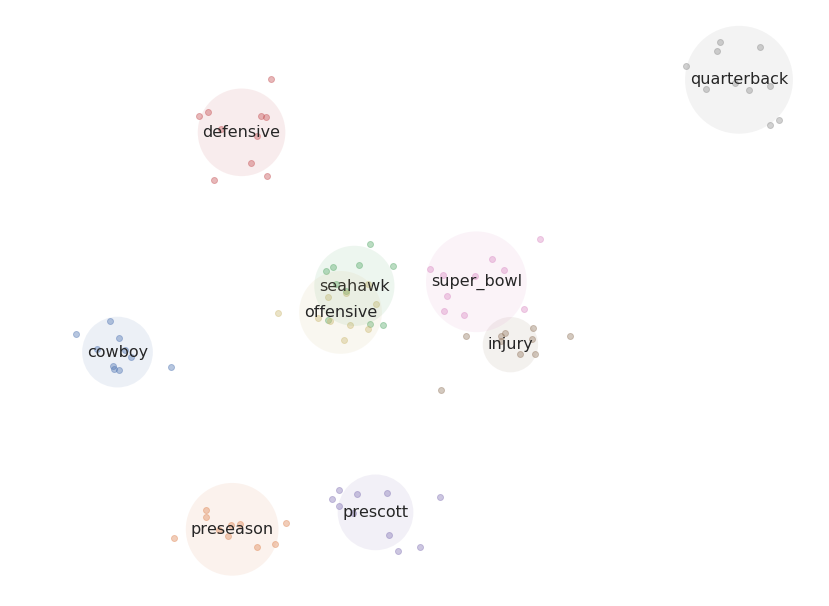

In [64]:
import numpy as np
import scipy
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(1000/72, 750/72), dpi=72)

topics = ['cowboy', 'preseason', 'seahawk', 'defensive', 'prescott', 'injury', 'super_bowl', 'quarterback', 'offensive']
centers = np.random.randint(low=0, high=20, size=(len(topics), 2))
for topic_name, center in zip(topics, centers): 
    topic = np.random.normal(loc=center, scale=1.0, size=(10, 2))
    dots = ax.scatter(topic[:, 0], topic[:, 1], alpha=0.4)
    bbox_props = dict(boxstyle="circle, pad=0.3", fc=dots.get_facecolor().ravel(), ec="none", alpha=0.1, lw=1)
    t = ax.text(*topic.mean(axis=0), topic_name, ha="center", va="center", rotation=0,
                size=16, bbox=bbox_props)
plt.axis("off");
plt.show()